In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print (tf.__version__)
print (sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print (module.__name__, module.__version__)

2.0.0-beta1
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)
matplotlib 3.1.1
numpy 1.16.4
pandas 0.24.2
sklearn 0.21.2
tensorflow 2.0.0-beta1
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print (housing.DESCR)
print (housing.data.shape)
print (housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
import pprint
pprint.pprint (housing.data[0:5])
pprint.pprint(housing.target[0:5])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7, test_size=0.25)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11, test_size = 0.25)

print (x_train.shape, y_train.shape)
print (x_valid.shape, y_valid.shape)
print (x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  #这里使用fit_transform函数，因为在训练集上获得均值和方差，在验证集和测试集上面使用
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [6]:
x_train.shape[0:]

(11610, 8)

In [7]:
# # 函数式API
# input = keras.layers.Input(shape=x_train.shape[1:])
# hidden1 = keras.layers.Dense(30,activation ='relu')(input)
# hidden2 = keras.layers.Dense(30,activation = 'relu')(hidden1)

# concat = keras.layers.concatenate([input, hidden2])
# output = keras.layers.Dense(1)(concat)

# model = keras.models.Model(inputs=[input],
#                           outputs = [output])


# #子类API
# class WideDeepModel(keras.models.Model):
#     def __init__(self):
#         super(WideDeepModel,self).__init__()
        
#         self.hidden1_layer = keras.layers.Dense(30,activation='relu')
#         self.hidden2_layer = keras.layers.Dense(30,activation='relu')
#         self.output_layer = keras.layers.Dense(1)
#     def call(self, input):
#         hidden1 = self.hidden1_layer(input)
#         hidden2 = self.hidden2_layer(hidden1)
#         concat = keras.layers.concatenate([input,hidden2])
#         output = self.output_layer(concat)
#         return output
# model = WideDeepModel()
# model.build(input_shape=(None, 8))
'''
多个输出，这时候是训练了两遍？
'''
input_wide = keras.layers.Input(shape = [5] )
input_deep = keras.layers.Input(shape=[6] )

hidden_1 = keras.layers.Dense(30, activation = 'relu')(input_deep)
hidden_2 = keras.layers.Dense(30, activation = 'relu')(hidden_1)
concat = keras.layers.concatenate([input_wide, hidden_2])
output = keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden_2)

model = keras.models.Model(inputs = [input_wide,input_deep],
                          outputs = [output,output2])


model.summary()
model.compile(loss="mean_squared_error", optimizer='sgd')
callbacks = [keras.callbacks.EarlyStopping(
    patience=5, min_delta=1e-2)]


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
______________________________________________________________________________________________

In [8]:
x_train_wide = x_train_scaled[:,:5]
x_train_deep = x_train_scaled[:,2:]
x_valid_wide = x_valid_scaled[:,:5]
x_valid_deep = x_valid_scaled[:,2:]

In [11]:
history = model.fit([x_train_wide,x_train_deep],[y_train,y_train],
                   validation_data=([x_valid_wide, x_valid_deep],[y_valid,y_valid]),
                   epochs=50,
                   callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 1s 79us/sample - loss: 1.9539 - dense_2_loss: 0.8167 - dense_3_loss: 1.1366 - val_loss: 1.2243 - val_dense_2_loss: 0.5029 - val_dense_3_loss: 0.7209
Epoch 2/50
11610/11610 [==============================] - 1s 53us/sample - loss: 1.0796 - dense_2_loss: 0.4585 - dense_3_loss: 0.6212 - val_loss: 1.0683 - val_dense_2_loss: 0.4579 - val_dense_3_loss: 0.6102
Epoch 3/50
11610/11610 [==============================] - 1s 68us/sample - loss: 0.9802 - dense_2_loss: 0.4257 - dense_3_loss: 0.5547 - val_loss: 1.0168 - val_dense_2_loss: 0.4666 - val_dense_3_loss: 0.5503
Epoch 4/50
11610/11610 [==============================] - 1s 73us/sample - loss: 0.9207 - dense_2_loss: 0.4050 - dense_3_loss: 0.5159 - val_loss: 0.9436 - val_dense_2_loss: 0.4127 - val_dense_3_loss: 0.5308
Epoch 5/50
11610/11610 [==============================] - 1s 95us/sample - loss: 0.9020 - dense_2_loss: 0.3876 - dense_3_lo

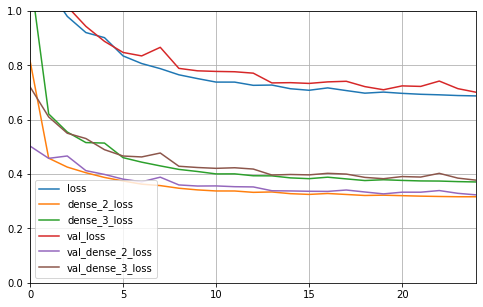

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)

    plt.show()
    
plot_learning_curves(history)

In [ ]:
model.evaluate(x_test_scaled,y_test)